**INTRODUCTION**
* The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. You can use it for some EDA or try to predict students final grade.
* Correlation between features
* Weekly Consumption of Alcohol
* Final Exam Scores According to Students' alcohol consumption
* Students grade with grade average according to alcohol consumption
*  Alcohol consumption: 1 time  is very  low and 10 times are very high

In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualize
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 9999
pd.options.display.float_format = '{:20,.2f}'.format

In [15]:
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [16]:
# I use final grade = G3, and weekly alcohol consumption = Dalc + Walc 
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Text(0.5, 1.0, 'Gender of students : F - female,M - male')

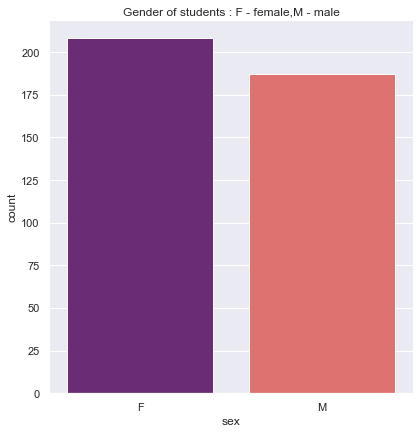

In [38]:
sns.catplot(x="sex", kind="count",palette="magma", data=data, height = 6)
plt.title("Gender of students : F - female,M - male")

In [40]:
ages = data["age"].value_counts()
labels = (np.array(ages.index))
sizes = (np.array((ages / ages.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Аge of students")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="age")

**Correlation between features**
* For broad perspective lets look at first correlation of features.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'Medu'),
  Text(0, 2.5, 'Fedu'),
  Text(0, 3.5, 'traveltime'),
  Text(0, 4.5, 'studytime'),
  Text(0, 5.5, 'failures'),
  Text(0, 6.5, 'famrel'),
  Text(0, 7.5, 'freetime'),
  Text(0, 8.5, 'goout'),
  Text(0, 9.5, 'Dalc'),
  Text(0, 10.5, 'Walc'),
  Text(0, 11.5, 'health'),
  Text(0, 12.5, 'absences'),
  Text(0, 13.5, 'G1'),
  Text(0, 14.5, 'G2'),
  Text(0, 15.5, 'G3')])

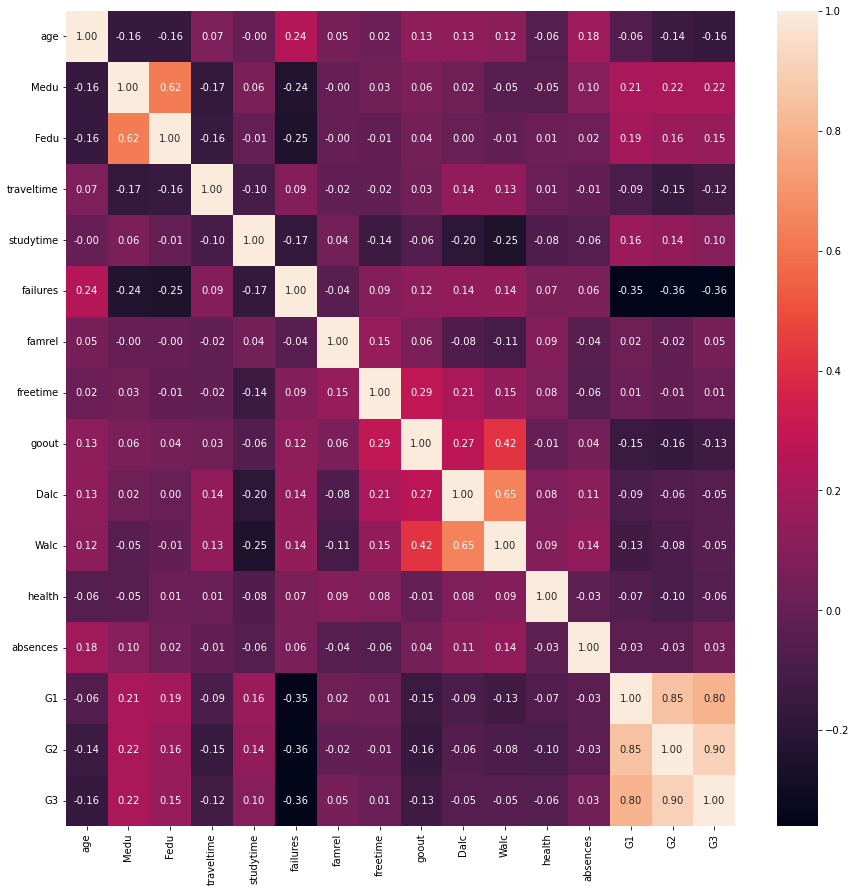

In [17]:

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot = True,fmt = ".2f",cbar = True)
plt.xticks(rotation=90)
plt.yticks(rotation = 0)


As it can be seen from correlation map only exam scoreas are highly correlated with each other. It says that if students takes almost same grade at each exams.

I am goint to combine weekdays alcohol consumption with weekend alcoho consumption.

In [18]:
data['Dalc'] = data['Dalc'] + data['Walc']

**Weekly Consumption of Alcohol**
* Students drink alcohol at least 2 times in a week.

Text(0.5, 0, 'Weekly alcohol consumption')

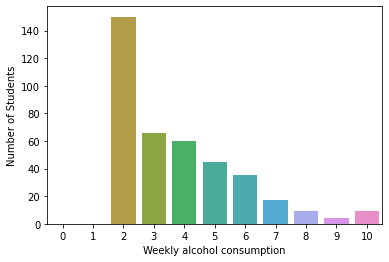

In [19]:
# There is no student who does not consume alcohol. However, all students at least 2 times in a week consume alcohol.
list = []
for i in range(11):
    list.append(len(data[data.Dalc == i]))
ax = sns.barplot(x = [0,1,2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Number of Students')
plt.xlabel('Weekly alcohol consumption')

**Final Exam Scores According to Students' alcohol consumption**
* I visualize taken total grades according to alcohol consuption

Text(0.5, 0, 'Students grade distribution according to weekly alcohol consumption')

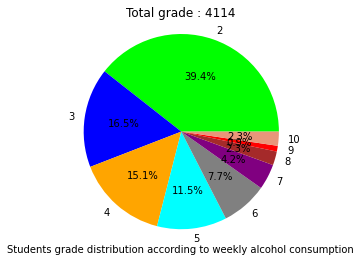

In [20]:
labels = ['2','3','4','5','6','7','8','9','10']
colors = ['lime','blue','orange','cyan','grey','purple','brown','red','darksalmon']
explode = [0,0,0,0,0,0,0,0,0]
sizes = []
for i in range(2,11):
    sizes.append(sum(data[data.Dalc == i].G3))
total_grade = sum(sizes)
average = total_grade/float(len(data))
plt.pie(sizes,explode=explode,colors=colors,labels=labels,autopct = '%1.1f%%')
plt.axis('equal')
plt.title('Total grade : '+str(total_grade))
plt.xlabel('Students grade distribution according to weekly alcohol consumption')


Well, it looks like students who consume alcohol 2 times in a week more successful than others. However, it actually cannot be understood from this graph. Because number of students who consume alcohol 2 times in a week more than others. Therefore, lets look at swarm plot to understand whether alcohol affects the success or not.

**Students grade with grade average according to alcohol consumption **
* Final exam average grade is 10.4
* In order to understand whether alcohol affects students success, I compare grades with average.

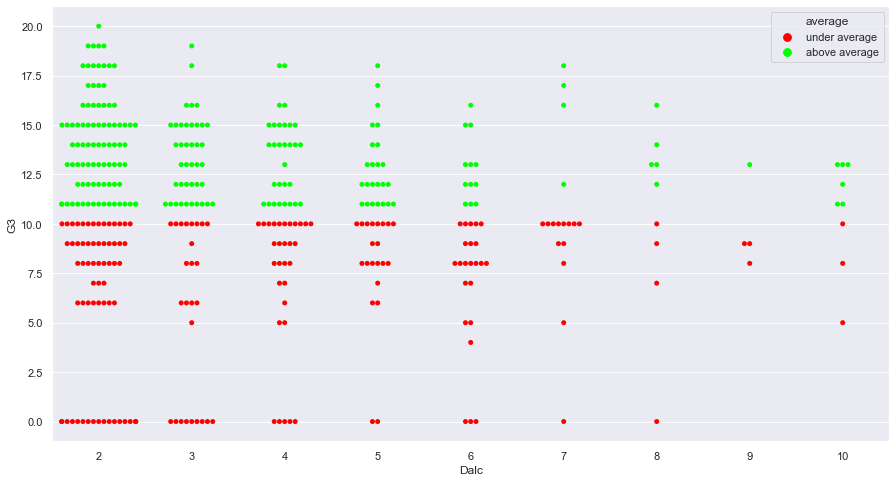

In [37]:
ave = sum(data.G3)/float(len(data))
data['ave_line'] = ave
data['average'] = ['above average' if i > ave else 'under average' for i in data.G3]
sns.set(rc = {'figure.figsize':(15,8)})
sns.swarmplot(x='Dalc', y = 'G3', s = 5, hue = 'average',data= data,palette={'above average':'lime', 'under average': 'red'})
plt.savefig('graph.png')


As it can be seen swarm plot, student who takes highest grade consumes alcohol only 2 times in a week.

In [22]:
sum(data[data.Dalc == 2].G3)/float(len(data[data.Dalc == 2]))

10.806666666666667

Text(0.5, 0, 'Weekly alcohol consumption')

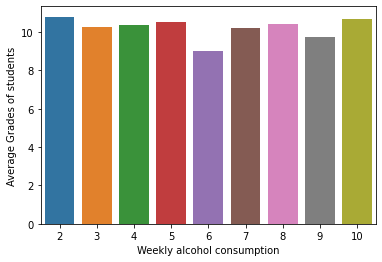

In [23]:
# Average grade
list = []
for i in range(2,11):
    list.append(sum(data[data.Dalc == i].G3)/float(len(data[data.Dalc == i])))
ax = sns.barplot(x = [2,3,4,5,6,7,8,9,10], y = list)
plt.ylabel('Average Grades of students')
plt.xlabel('Weekly alcohol consumption')

Then let's see how many hours a week students spend on their studies.

In [41]:
data['st_time'] = np.nan
df = [data]

for col in df:
    col.loc[col['studytime'] == 1 , 'st_time'] = '< 2 hours'
    col.loc[col['studytime'] == 2 , 'st_time'] = '2 to 5 hours'
    col.loc[col['studytime'] == 3, 'st_time'] = '5 to 10 hours'
    col.loc[col['studytime'] == 4, 'st_time'] = '> 10 hours'  
 
labels = data["st_time"].unique().tolist()
amount = data["st_time"].value_counts().tolist()

colors = ["pink", "cyan", "green", "yellow"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))
dt = [trace]
layout = go.Layout(title="Study time")

fig = go.Figure(data=dt, layout=layout)
iplot(fig, filename='pie')

Most students spend 2 to 5 and 5 to 10 hours a week studying. It would be better if we had the exact number of hours for each student. Personally, I think a student who spends 5 hours a week studying is a diligent student. 2 hours is not always enough. But we can pay attention to the impact of the number of hours spent on study on the final grade of the student.

<AxesSubplot:title={'center':'Box plot for final grades,depending on the study time'}, xlabel='G3', ylabel='st_time'>

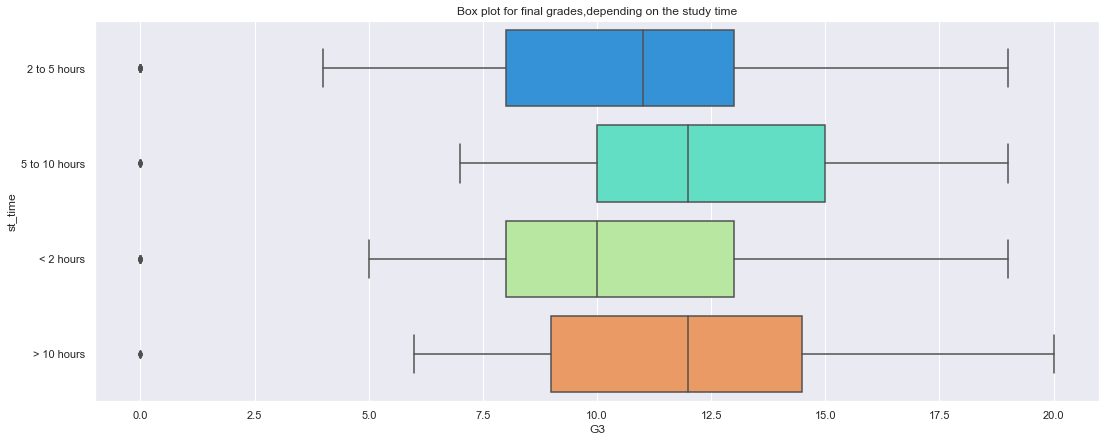

In [42]:
plt.figure(figsize=(18,7))
plt.title("Box plot for final grades,depending on the study time")
sns.boxplot(y="st_time", x="G3", data = data , orient="h", palette = 'rainbow')

The lowest average result is shown by students who spend less than two hours a week studying. Of course! I am a student and I can say that this time is not enough. Especially when it comes to mathematics. Few students spend more than 10 hours a week studying. But they show a very good result. Sometimes we're all lazy. But we must try to find time to study and good grades will become stable. We have information about the student's place of residence: city or village. Let's see. This may be useful to us in the future. Perhaps students living in the city are much more likely to attend parties with alcohol or are busy with more interesting things than studying. Or students living in villages may be too lazy to get to school and miss classes. Also display the time that students spend on the way to school ( 1 - very close, 4 - very far).

Text(0.5, 1.0, 'Students address: U - urban, R - rural')

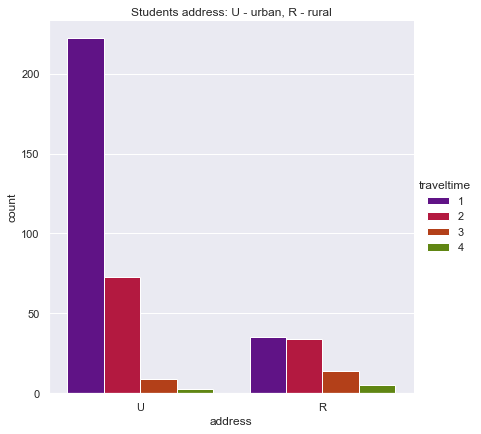

In [43]:
sns.catplot(x="address", kind="count",hue = "traveltime",palette="brg", data=data, height = 6)
plt.title("Students address: U - urban, R - rural")

Most of the students live in the city. Few students take long to get to school. But still, let's see if this affects the number of absences.

Text(0.5, 1.0, 'Distribution of absences for students who live in village')

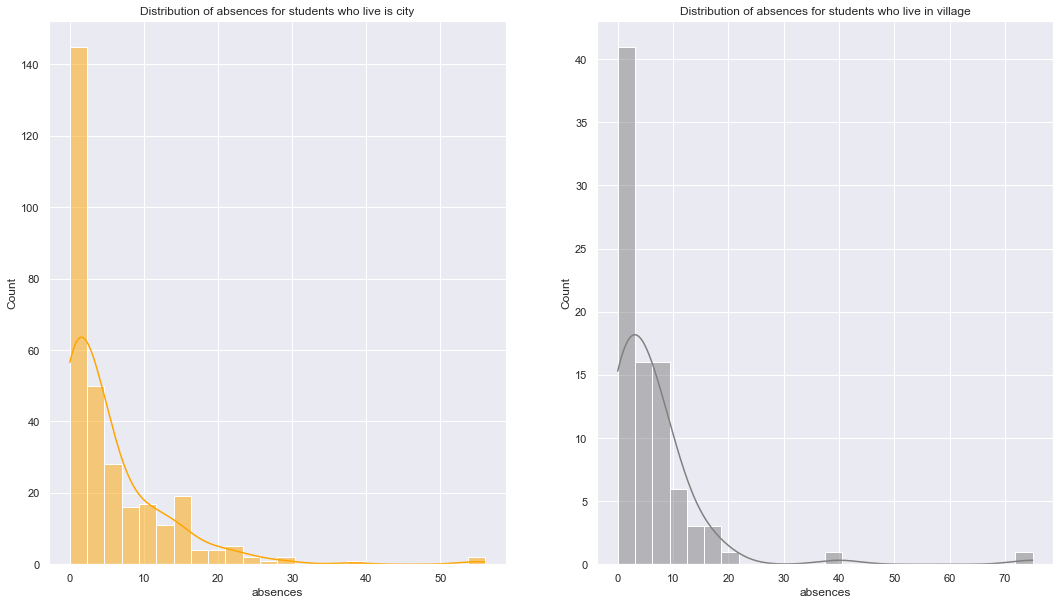

In [51]:
f= plt.figure(figsize=(18,10))

ax=f.add_subplot(121)
sns.histplot(data[(data.address == 'U')]["absences"],color='orange', kde = True)
ax.set_title('Distribution of absences for students who live is city')

ax=f.add_subplot(122)
sns.histplot(data[(data.address == 'R')]['absences'],color='gray', kde = True)
ax.set_title('Distribution of absences for students who live in village')

Yet among the students living in the village there are people with a lot of absences. But while we can not say for sure that this is due to the fact that the student does not live in the city. But of course this may be due to traffic jams on the road or not a very good transport schedule.